<a href="https://colab.research.google.com/github/superweark1/Earl-Sonnie-Andrew-S.-Plecerda/blob/main/LabExercise5_Plecerda%2CLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from PIL import Image
import os

In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Define path to the dataset
dataset_path = '/content/drive/MyDrive/labExercise5/dataset'

In [25]:
# Define parameters
img_width, img_height = 150, 150
batch_size = 25

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 72 files belonging to 2 classes.
Using 58 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 72 files belonging to 2 classes.
Using 14 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['Dixie_pic', 'Sonnie_pic']


In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(25, 150, 150, 3)
(25,)


In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
normalization_layer = layers.Rescaling(1./255)

In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9903036


In [33]:
# Create the model
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [36]:
# Train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 8s 3s/step - loss: 0.5754 - accuracy: 0.5690 - val_loss: 0.2671 - val_accuracy: 0.9286
Epoch 2/10
3/3 [==============================] - 1s 332ms/step - loss: 0.4259 - accuracy: 0.6897 - val_loss: 0.5990 - val_accuracy: 0.7143
Epoch 3/10
3/3 [==============================] - 1s 526ms/step - loss: 0.3551 - accuracy: 0.8621 - val_loss: 0.1036 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 438ms/step - loss: 0.1211 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 504ms/step - loss: 0.0686 - accuracy: 0.9828 - val_loss: 0.1182 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 529ms/step - loss: 0.0430 - accuracy: 0.9828 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 570ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=======

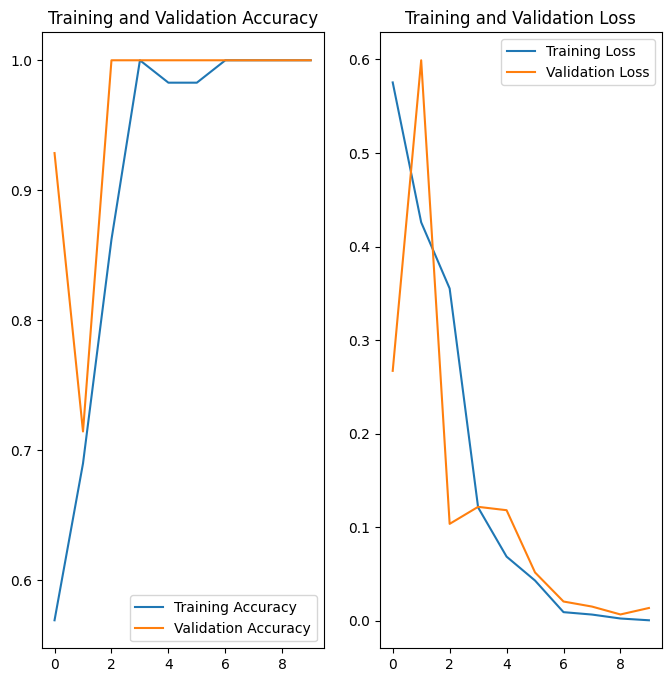

In [37]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.5, 1.5),
    fill_mode='nearest'
)

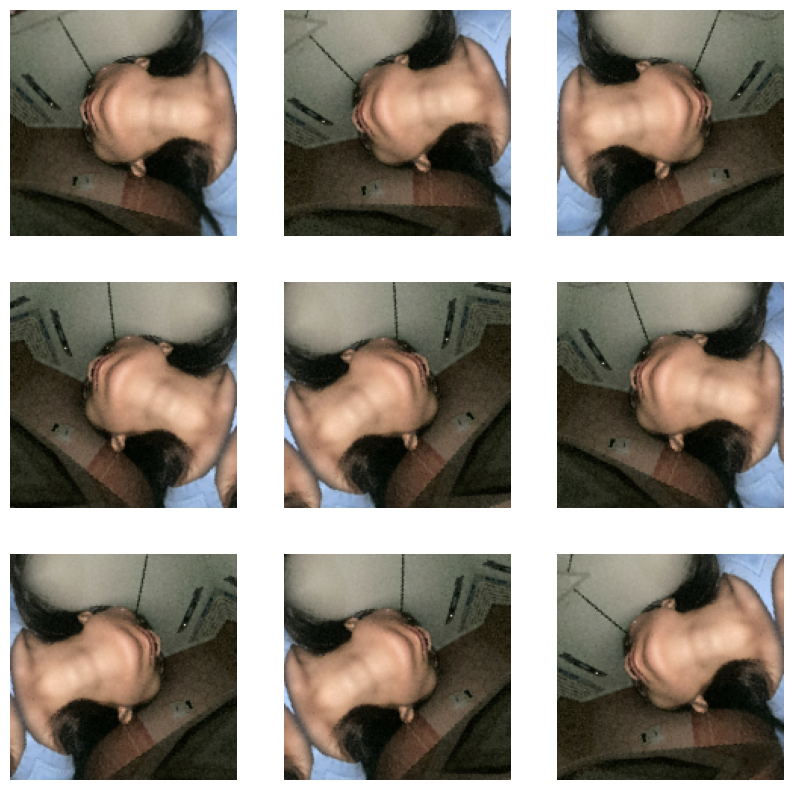

In [45]:
import tensorflow as tf
from tensorflow.keras import layers

# Define a data augmentation pipeline using Keras preprocessing layers
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
])

# Assuming `train_ds` is your original dataset containing images and labels.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [52]:
sample_image_path = '/content/drive/MyDrive/labExercise5/dataset/1714572521975.jpeg'

# Load and preprocess the image
img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Output the prediction
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to Sonnie_pic with a 100.00 percent confidence.


In [54]:
sample_image_path = '/content/drive/MyDrive/labExercise5/dataset/IMG_8607.jpeg'

# Load and preprocess the image
img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Output the prediction
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 106ms/step
This image most likely belongs to Dixie_pic with a 99.99 percent confidence.


In [56]:
sample_image_path = '/content/drive/MyDrive/labExercise5/dataset/images.jpg'

# Load and preprocess the image
img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Output the prediction
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to Sonnie_pic with a 83.72 percent confidence.
